# Задача 5.1

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# График плотности $\xi$

Построим график плотности случайного вектора $\xi = (\xi_1, \xi_2) \sim N(a, \Sigma)$, где $a = \left(\begin{array}{c} 
1\\
4
\end{array} \right)$, 
$\Sigma = \left(\begin{array}{cc} 
10 & 8\\
8 & 10
\end{array} \right)$

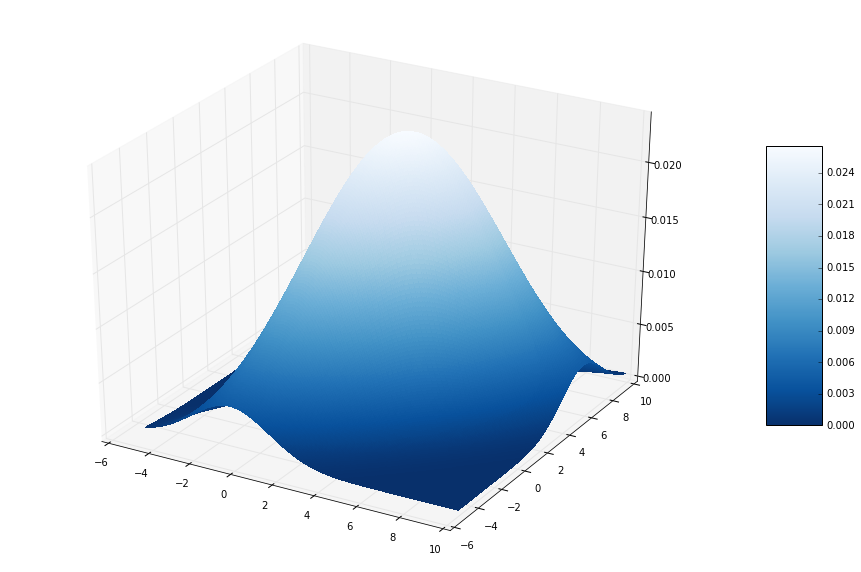

In [3]:
from mpl_toolkits.mplot3d import Axes3D

grid = np.mgrid[-5:10:0.05, -5:10:0.05]
density = np.array([[sps.multivariate_normal.pdf((grid[0, i, j], grid[1, i, j]), mean=[1, 4], cov=[[10, 8], [8, 10]])
                       for i in range(grid[0].shape[0])]
                       for j in range(grid[0].shape[1])])

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(grid[0], grid[1], density, rstride=1, cstride=1, cmap='Blues_r',
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 0.024)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Графики зависимости $f_{(\xi_1 | \xi_2)}(x  |  y)$ от x

In [4]:
from math import sqrt

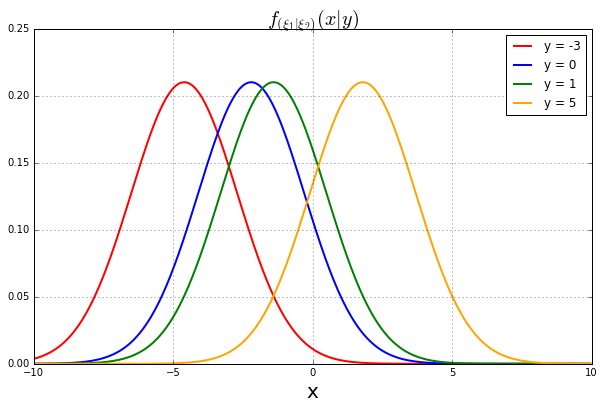

In [5]:
y = np.array([-3, 0, 1, 5])
x = np.arange(-10, 10, 0.05)
colors = ['red', 'blue', 'green', 'orange']

plt.figure(figsize=(10, 6))
for i in range(y.shape[0]):
    conditional_density = np.array([sps.multivariate_normal.pdf((x[j], y[i]), mean=[1, 4], cov=[[10, 8], [8, 10]])
                      for j in range(x.shape[0])]) / sps.norm.pdf(y[i], loc = 4, scale = sqrt(10))
    plt.plot(x, conditional_density, color=colors[i], linewidth=2, label='y = '+str(y[i]))
plt.legend()
plt.xlim((-10, 10))
plt.ylim((0, 0.25))
plt.xlabel("x", fontsize = 20)
plt.title(r'$f_{(\xi_1 | \xi_2)}(x | y)$', fontsize = 20)
plt.grid() 

# График зависимости $E(\xi_1 | \xi_2 = y)$ от $y$

Найдём $E(\xi_1 | \xi_2)$:

$$\xi_1 = \xi_1 - \alpha \cdot \xi_2 + \alpha \cdot \xi_2 = z + \alpha \cdot \xi_2$$.

Если z и $\alpha \cdot \xi_2$ независимы, то 

$$E(\xi_1 | \xi_2) = E(z + \alpha \cdot \xi_2 | \xi_2) = E(z | \xi_2) + \alpha \cdot E(\xi_2 | \xi_2) = Ez + \alpha \cdot \xi_2$$.

Компоненты гауссовского вектора независимы тогда и только тогда, когда их ковариация равна нулю. Найдем, при каком $\alpha$ z и $\xi_2$ независимы:

$$cov(z, \xi_2) = 0 \Leftrightarrow cov(\xi_1 - \alpha \cdot \xi_2, \xi_2) = 0 \Leftrightarrow cov(\xi_1, \xi_2) = \alpha \cdot cov(\xi_2, \xi_2)$$

Из матрицы ковариаций: $cov(\xi_1, \xi_2) = 8$, $cov(\xi_2, \xi_2) = 10$. Значит, $\alpha = \frac{4}{5}$.

$$E(\xi_1 | \xi_2) = Ez + \alpha \cdot \xi_2 = E\xi_1 - \alpha \cdot E\xi_2 + \alpha \cdot \xi_2 = 1 - \frac{4}{5} \cdot 4 + \frac{4}{5} \cdot \xi_2 = \frac{4}{5} \cdot \xi_2 - \frac{11}{5}$$
$$E(\xi_1 | \xi_2 = y) = \frac{4}{5} \cdot y - \frac{11}{5}$$

Построим график зависимости $E(\xi_1 | \xi_2 = y)$ от $y$. На графике проведём прямую $x = E\xi_1$ (так как $\xi_1 \sim N(1, 10)$, это прямая $x = 1$).

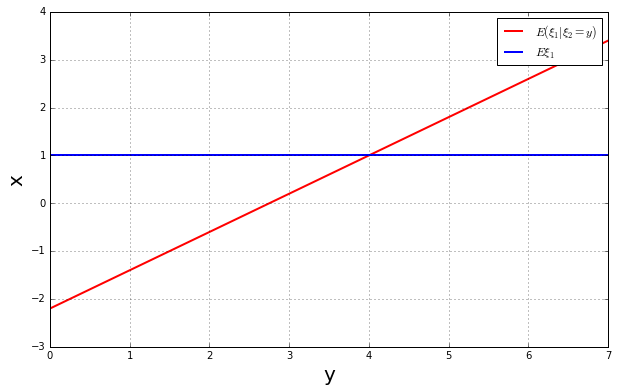

In [6]:
y = np.linspace(0, 7, 1000)
x1 = y * 0.8 - 2.2
x2 = np.ones(1000)

plt.figure(figsize=(10, 6))
plt.plot(y, x1, color='red', linewidth=2, label=r'$E(\xi_1 | \xi_2 = y)$')
plt.plot(y, x2, color='blue', linewidth=2, label=r'$E\xi_1$')
plt.legend()
plt.xlim((0, 7))
plt.ylim((-3, 4))
plt.xlabel("y", fontsize=20)
plt.ylabel("x", fontsize=20)
plt.title('', fontsize = 20)
plt.grid() 

Из графика видно, что $E(\xi_1 | \xi_2 = y) = E\xi_1$ при $\xi_2 = E\xi_2 = 4$. 